# **Sample Images**

## **Imports**

In [21]:
import os
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import pandas as pd

## **Random Sample Images From Final Data Set**

In [23]:
# Define the folder path and image extensions
folder_path = '../src/final_data'
image_extensions = ('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')
temp_folder_path = 'viz_images'
metadata = pd.read_csv('../src/meta_data.csv')

In [26]:
metadata.head()

,CarMake,Model,Year,Color,Info,ID,Filename
0,BMW,1 Series,2015,Black,8_1,1108,BMW$$1 Series$$2015$$Black$$8_1$$1108$$image_0...
1,BMW,1 Series,2015,Black,8_1,1108,BMW$$1 Series$$2015$$Black$$8_1$$1108$$image_1...
2,BMW,1 Series,2015,Black,8_1,1108,BMW$$1 Series$$2015$$Black$$8_1$$1108$$image_1...
3,BMW,1 Series,2015,Black,8_1,1108,BMW$$1 Series$$2015$$Black$$8_1$$1108$$image_2...
4,BMW,1 Series,2015,Black,8_1,1108,BMW$$1 Series$$2015$$Black$$8_1$$1108$$image_3...


Mercedes-Benz - E Class (2019)


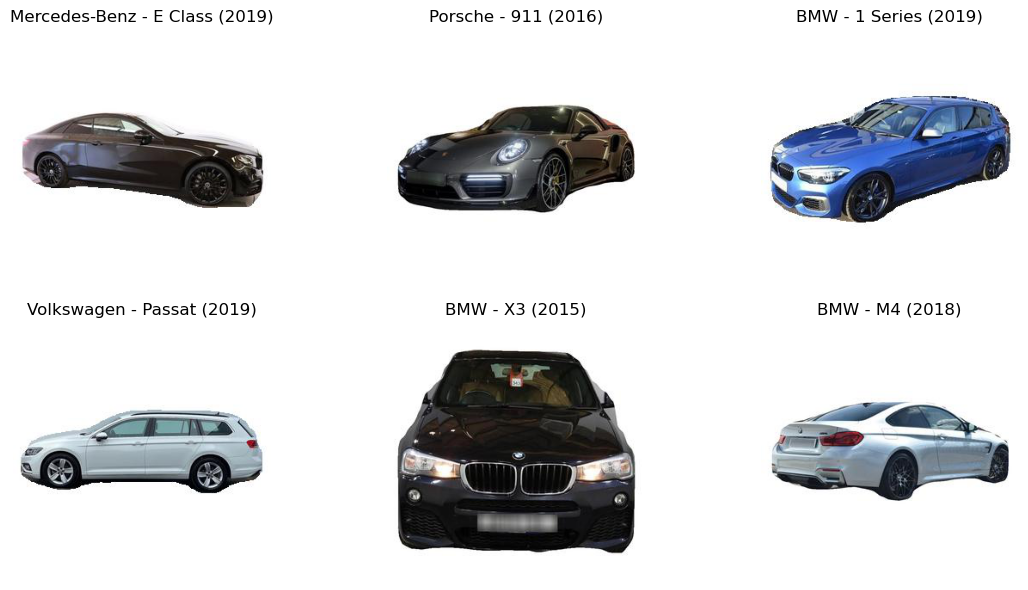

In [83]:
# Ensure the temporary folder exists
if not os.path.exists(temp_folder_path):
    os.makedirs(temp_folder_path)

image_files = metadata['Filename'].tolist()
image_count = len(image_files)
selected_images = random.sample(image_files, 6)

renamed_images = []
series_names = []
if selected_images:
    for i, img_name in enumerate(selected_images):
        car_str = metadata[metadata["Filename"] == img_name]["CarMake"].values[0]
        model_str = metadata[metadata["Filename"] == img_name]["Model"].values[0]
        year_str = metadata[metadata["Filename"] == img_name]["Year"].values[0]
        series_names.append(f"{car_str} - {model_str} ({year_str})")
        src_path = os.path.join(folder_path, img_name)
        new_name = f'image_{i+1}{os.path.splitext(img_name)[1]}'
        new_path = os.path.join(temp_folder_path, new_name)
        shutil.copy(src_path, new_path)
        renamed_images.append(new_path)


print(str(series_names[0]))
i = 0
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
for ax, img_path in zip(axes.flatten(), renamed_images):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(str(series_names[i]))

    i += 1

plt.tight_layout()
plt.savefig("../src/visualizations/sample_cars.png")
plt.show()


# Clean up the temporary folder
shutil.rmtree(temp_folder_path)